In [3]:
import numpy as np
from matplotlib import pyplot as plt
from numpy import genfromtxt
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import LogisticRegression


from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error


from sklearn import svm, datasets


%matplotlib inline

In [4]:
def load_data(filename, skiprows = 1):
    """
    Function loads data stored in the file filename and returns it as a numpy ndarray.
    
    Inputs:
        filename: given as a string.
        
    Outputs:
        Data contained in the file, returned as a numpy ndarray
    """
    return np.loadtxt(filename, skiprows=skiprows, delimiter=' ')

# Getting training data

In [5]:
training_data = np.array(load_data("training_data.txt", skiprows = 1))

In [6]:
y_train = training_data[:, 0]
X_train = training_data[:, 1:]

In [7]:
f = open("training_data.txt")
words = f.readline()
bag = words.split()
bag = np.array(bag[1:])
bag

to_keep = []
for i in range(len(bag)):
    if not len(bag[i]) <= 3:
        to_keep.append(i)
        
        
len(to_keep)

881

In [8]:
def get_keepers (bag, threshold, X):
    to_keep = []
    for i in range(len(bag)):
        if not len(bag[i]) <= threshold:
            to_keep.append(i)
    return X[:,to_keep]

In [9]:
f = open("training_data.txt")
words = f.readline()
bag = words.split()
bag = np.array(bag[1:])

X = get_keepers (bag, 5, X_train)
len(X[0])

352

In [7]:
test_data = np.array(load_data("test_data.txt"))

In [8]:
X_test = test_data

# Lasso Trial

In [25]:
def binary_clf_error(y_pred, y_correct):
    '''Predicts binary classification error'''
    binarytrain_number = (y_pred!=y_correct).sum()
    return binarytrain_number/len(y_pred)

In [26]:
y_regression_train = y_train
y_regression_train[y_regression_train==0] = -1


In [27]:
#This is approximately the best one found
#It got like 85% test accuracy.
streng = 0.00070

lasso = Lasso(alpha = streng)
lasso.fit(X_train, y_regression_train)   
y_pred = np.sign(lasso.predict(X_train))

#Finding error
binary_clf_error(y_pred, y_regression_train)

0.13525000000000001

In [28]:
non_zero_inds = np.nonzero(lasso.coef_)
X_slim = X_train[:, non_zero_inds][:,0,:]
X_test_slim = X_test[:, non_zero_inds][:,0,:]

In [21]:
X_slim.shape

(20000, 641)

In [19]:
np.nonzero(lasso.coef_)

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
         27,  28,  29,  30,  31,  33,  34,  35,  37,  38,  39,  40,  41,
         42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,  53,  54,
         55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,  66,  67,
         68,  69,  70,  71,  72,  73,  75,  76,  77,  78,  79,  80,  81,
         83,  84,  85,  86,  87,  88,  89,  90,  91,  92,  93,  94,  95,
         96,  97,  98,  99, 100, 101, 102, 103, 104, 105, 106, 107, 108,
        109, 110, 111, 112, 115, 116, 118, 119, 120, 121, 122, 123, 124,
        125, 126, 127, 128, 129, 130, 131, 133, 134, 135, 136, 138, 140,
        142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154,
        155, 157, 158, 159, 160, 161, 162, 163, 164, 166, 168, 169, 170,
        172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184,
        188, 189, 192, 193, 194, 195, 196, 197, 199

# We can probably do something about these weights

We see that to get 85% test accuracy, we don't even need 302 of the weights.

In [32]:
#We can use this code to check which regularization term is optimal.
#This can be adapted for other models to find optimal regularization terms as well.

#Initializing alpha list
alpha_values = np.linspace(0.000001, .01, num=20)
training_error_list = []
validation_error_list = []

for alpha_value in alpha_values:
    #Initializing Kfold cv object
    kf = KFold(n_splits=5)
    training_error = []
    validation_error = []
    
    for train_index, test_index in kf.split(X_train):
        #Partitioning dataset using index set
        X_training = X_train[train_index]
        y_training = y_regression_train[train_index]

        X_testing = X_train[test_index]
        y_testing = y_regression_train[test_index]

        #Running Lasso regression on training partition
        lasso = Lasso(alpha = alpha_value)
        lasso.fit(X_training, y_training)

        #Finding training error 
        training_error.append(binary_clf_error(np.sign(lasso.predict(X_training)), y_training))

        #Finding validation error
        validation_error.append(binary_clf_error(np.sign(lasso.predict(X_testing)), y_testing))
    training_error_list.append(np.mean(training_error))
    validation_error_list.append(np.mean(validation_error))




In [33]:
[alpha_values, validation_error_list]

[array([  1.00000000e-06,   5.27263158e-04,   1.05352632e-03,
          1.57978947e-03,   2.10605263e-03,   2.63231579e-03,
          3.15857895e-03,   3.68484211e-03,   4.21110526e-03,
          4.73736842e-03,   5.26363158e-03,   5.78989474e-03,
          6.31615789e-03,   6.84242105e-03,   7.36868421e-03,
          7.89494737e-03,   8.42121053e-03,   8.94747368e-03,
          9.47373684e-03,   1.00000000e-02]),
 [0.15640000000000001,
  0.15165000000000001,
  0.15394999999999998,
  0.1585,
  0.16194999999999998,
  0.1678,
  0.17370000000000002,
  0.17974999999999999,
  0.18334999999999999,
  0.18760000000000002,
  0.19095000000000001,
  0.19390000000000002,
  0.19660000000000002,
  0.19895000000000002,
  0.20085000000000003,
  0.20319999999999999,
  0.2051,
  0.20725000000000002,
  0.20924999999999999,
  0.21049999999999999]]

Text(0.5,1,'Finding Optimal alpha value')

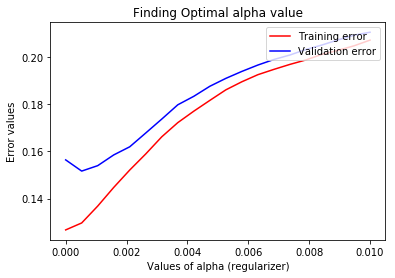

In [35]:
legend_handles = []
series_names = []

plt.close('all')
plt.figure()

#Plotting error
data_series, = plt.plot(alpha_values, training_error_list, 'r-', label = 'Training error')
legend_handles.append(data_series)
series_names.append('Training error')

data_series, = plt.plot(alpha_values, validation_error_list, 'b-', label = 'Validation error')
legend_handles.append(data_series)
series_names.append('Validation error')

plt.legend(legend_handles, series_names, loc = "upper right")
plt.ylabel('Error values')
plt.xlabel('Values of alpha (regularizer)')
plt.title('Finding Optimal alpha value')

# Ridge Trial

In [45]:
y_regression_train = y_train
y_regression_train[y_regression_train==0] = -1

#This is approximately the best one found
#Test error is like 0.1519
streng = 130

ridge = Ridge(alpha = streng)
ridge.fit(X_train, y_regression_train)   
y_pred = np.sign(ridge.predict(X_train))

#Finding error
binary_clf_error(y_pred, y_regression_train)

0.1308

In [42]:
#We can use this code to check which regularization term is optimal.
#This can be adapted for other models to find optimal regularization terms as well.

#Initializing alpha list
alpha_values = np.linspace(40, 160, num=5)
training_error_list = []
validation_error_list = []

for alpha_value in alpha_values:
    #Initializing Kfold cv object
    kf = KFold(n_splits=5, shuffle=True)
    training_error = []
    validation_error = []
    
    for train_index, test_index in kf.split(X_train):
        #Partitioning dataset using index set
        X_training = X_train[train_index]
        y_training = y_regression_train[train_index]

        X_testing = X_train[test_index]
        y_testing = y_regression_train[test_index]

        #Running Lasso regression on training partition
        ridge = Ridge(alpha = alpha_value)
        ridge.fit(X_training, y_training)

        #Finding training error 
        training_error.append(binary_clf_error(np.sign(ridge.predict(X_training)), y_training))

        #Finding validation error
        validation_error.append(binary_clf_error(np.sign(ridge.predict(X_testing)), y_testing))

    training_error_list.append(np.mean(training_error))
    validation_error_list.append(np.mean(validation_error))





In [43]:
[alpha_values, validation_error_list]

[array([  40.,   70.,  100.,  130.,  160.]),
 [0.15445,
  0.15309999999999999,
  0.15215000000000001,
  0.15190000000000001,
  0.15289999999999998]]

Text(0.5,1,'Finding Optimal alpha value')

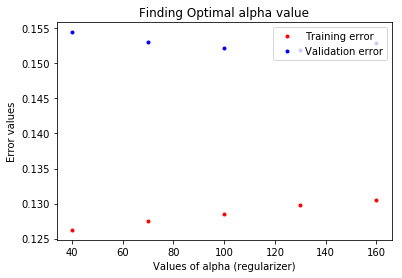

In [44]:
legend_handles = []
series_names = []

plt.close('all')
plt.figure()

#Plotting error
data_series, = plt.plot(alpha_values, training_error_list, 'r.', label = 'Training error')
legend_handles.append(data_series)
series_names.append('Training error')

data_series, = plt.plot(alpha_values, validation_error_list, 'b.', label = 'Validation error')
legend_handles.append(data_series)
series_names.append('Validation error')

plt.legend(legend_handles, series_names, loc = "upper right")
plt.ylabel('Error values')
plt.xlabel('Values of alpha (regularizer)')
plt.title('Finding Optimal alpha value')

# SVM Classifier Trial

In [ ]:
svc = svm.SVC(kernel='linear', C=10,gamma='auto')
svc.fit(X_slim, y_regression_train)

In [ ]:
y_pred = np.sign(svc.predict(X_slim))

In [ ]:
binarytrain_error = (y_pred!=y_train).sum()

In [ ]:
binarytrain_error/20000

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

# Using Logistic Regression

In [1]:
def binary_clf_error(y_pred, y_correct):
    '''Predicts binary classification error'''
    binarytrain_number = (y_pred!=y_correct).sum()
    return binarytrain_number/len(y_pred)

In [2]:
#This was the optimal regularizing term found.
log_reg = LogisticRegression(C = 0.2)
_ = log_reg.fit(X_slim, y_train)
binary_clf_error(log_reg.predict(X_slim), y_train)

NameError: name 'LogisticRegression' is not defined

In [86]:
predicted_labels = np.array(log_reg.predict(X_test_slim)).astype(int)
predicted_labels[predicted_labels==-1] = 0

list_nums= [x for x in range(1, 10001)]
output_vector = np.column_stack((list_nums, predicted_labels))
np.savetxt("predicted_labels.txt", output_vector, fmt='%i', delimiter=',', header="Id,Prediction")
output_vector

array([[    1,     1],
       [    2,     1],
       [    3,     0],
       ..., 
       [ 9998,     0],
       [ 9999,     1],
       [10000,     0]])

In [ ]:
#Used to be around 0.06/0.15

In [83]:
#We can use this code to check which regularization term is optimal.
#This can be adapted for other models to find optimal regularization terms as well.


#Initializing C list
c_values = np.linspace(0.07, 0.20, num=5)
training_error_list = []
validation_error_list = []

for c_value in c_values:
    #Initializing Kfold cv object
    kf = KFold(n_splits=15, shuffle = True)

    training_error = []
    validation_error = []
    
    for train_index, test_index in kf.split(X_slim):
        #Partitioning dataset using index set
        X_training = X_slim[train_index]
        y_training = y_train[train_index]

        X_testing = X_slim[test_index]
        y_testing = y_train[test_index]

        #Running Logistic regression on training partition
        log_reg = LogisticRegression(C = c_value)
        log_reg.fit(X_training, y_training)

        #Finding training error 
        training_error.append(binary_clf_error(log_reg.predict(X_training), y_training))

        #Finding validation error
        validation_error.append(binary_clf_error(log_reg.predict(X_testing), y_testing))
    training_error_list.append(np.mean(training_error))
    validation_error_list.append(np.mean(validation_error))





In [84]:
[c_values, validation_error_list]

[array([ 0.07  ,  0.1025,  0.135 ,  0.1675,  0.2   ]),
 [0.14525051802680802,
  0.14389999298925182,
  0.14449916827032844,
  0.14335056777687677,
  0.14319978045485884]]

Text(0.5,1,'Finding Optimal C value')

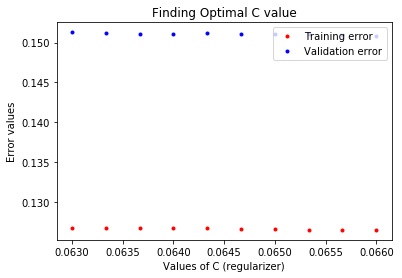

In [116]:
legend_handles = []
series_names = []

plt.close('all')
plt.figure()

#Plotting error
data_series, = plt.plot(c_values, training_error_list, 'r.', label = 'Training error')
legend_handles.append(data_series)
series_names.append('Training error')

data_series, = plt.plot(c_values, validation_error_list, 'b.', label = 'Validation error')
legend_handles.append(data_series)
series_names.append('Validation error')

plt.legend(legend_handles, series_names, loc = "upper right")
plt.ylabel('Error values')
plt.xlabel('Values of C (regularizer)')
plt.title('Finding Optimal C value')

# Neural Network Simple Implementation

In [45]:
clf = svm.SVC(C=1.0, kernel = 'linear')
clf.fit(X_train[:1000], y_train[:1000])

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [40]:
y_train[0:5]

array([ 1.,  1.,  1.,  1., -1.])

# Feature analysis/eliminate words

# Consider more complex Models

In [ ]:
log_reg = LogisticRegression(C = 1e9)
log_reg.fit(X, y)   # Fit the ridge regression model to the data